In [1]:
%matplotlib notebook


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
#import matplotlib.colors 
import matplotlib.cm as cm
#import scipy.interpolate as inter
import os
from scipy.optimize import curve_fit
# from lmfit import Model, Parameters
# from lmfit import Parameter
import sys
import warnings

warnings.simplefilter('ignore')  # shut off the warnings about slices

In [3]:
folder_that_contains_code='/Users/davidkramer/Dropbox/kramerLabSoftware/IDEASpec/IDEASpecPy/'
#adds the folder to your system path
sys.path.append(os.path.abspath(folder_that_contains_code)) #AK_ECS_multiwavelength_DMK_3 for fast_NPQ_3e-Copy2.py"))

#imports the code for this analysis

import IDEASpecPy as Ipy

In [29]:
#load the experimental data from spreadsheet

folder_name='' 

file_name='/Users/davidkramer/Dropbox/Data/atsuko/Rapid qE JSON/gg18.datcombined.json'

open_file_name=folder_name+file_name

sample_df=pd.read_json(open_file_name) 

In [30]:
sample_df.head(3)

,475_I,475_I0,475_I0a,475_Ia,475_calc,475_calca,475_time,475auxtime,488_I,488_I0,...,protocol_label,protocol_number,reference_channel,reference_gain,sample_channel,sample_gain,start_time,trace_label,trace_number,wl
0,"[0.8132933999999999, 0.8119200999999999, 0.811...","[6.708374, 6.699219, 6.698685, 6.699142, 6.699...","[-10, -10, -10, -10, -10, -10, -10, -10, -10, ...","[0.12336739999999999, 0.1213074, 0.12199399999...","[0.003709172, 0.004443123, 0.004647186, 0.0045...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0142, 0.035568999999999996, 0.0569379999999...","[0.0142, 0.035568999999999996, 0.0569379999999...","[0.2915192, 0.2906799, 0.29045099999999996, 0....","[3.663788, 3.6515050000000002, 3.648682, 3.647...",...,0,1,1,"[3, 3, 3, 3, 3, 3, 0]",0,"[3, 3, 3, 3, 3, 3, 0]",116.7942,baseline,2,0
1,"[0.8151244999999999, 0.814209, 0.8132935, 0.81...","[6.723328, 6.713257, 6.712952, 6.713257, 6.713...","[-10, -10, -10, -10, -10, -10, -10, -10, -10, ...","[0.123291, 0.1217651, 0.1217651, 0.12115479999...","[0.0037421850000000003, 0.004230248000000001, ...","[0.12083909999999999, 0.1262476, 0.1262476, 0....","[145.404, 145.4254, 145.4468, 145.4681, 145.48...","[145.404, 145.4254, 145.4468, 145.4681, 145.48...","[0.2920532, 0.2911377, 0.2905273, 0.2902222, 0...","[3.66333, 3.651733, 3.649292, 3.647156, 3.6474...",...,0,1,1,"[3, 3, 3, 3, 3, 3, 0]",0,"[3, 3, 3, 3, 3, 3, 0]",145.3898,fluct,1,0
2,"[0.8172607, 0.8151244999999999, 0.816040000000...","[6.734009, 6.723022, 6.722717, 6.723022, 6.723...","[-10, -10, -10, -10, -10, -10, -10, -10, -10, ...","[0.123291, 0.12115479999999999, 0.1217651, 0.1...","[0.00368672, 0.004823405, 0.00433589, 0.004823...","[0.1213563, 0.12894709999999998, 0.1267647, 0....","[181.5341, 181.5555, 181.5768, 181.5982, 181.6...","[181.5341, 181.5555, 181.5768, 181.5982, 181.6...","[0.2914429, 0.2908325, 0.2914429, 0.2908325, 0...","[3.666992, 3.654175, 3.651123, 3.649597, 3.648...",...,0,1,1,"[3, 3, 3, 3, 3, 3, 0]",0,"[3, 3, 3, 3, 3, 3, 0]",181.5199,fluct,1,0


In [31]:
sample_df.keys()

Index(['475_I', '475_I0', '475_I0a', '475_Ia', '475_calc', '475_calca',
       '475_time', '475auxtime', '488_I', '488_I0', '488_I0a', '488_Ia',
       '488_calc', '488_calca', '488_time', '488auxtime', '505_I', '505_I0',
       '505_I0a', '505_Ia', '505_calc', '505_calca', '505_time', '505auxtime',
       '520_I', '520_I0', '520_I0a', '520_Ia', '520_calc', '520_calca',
       '520_time', '520auxtime', '535_I', '535_I0', '535_I0a', '535_Ia',
       '535_calc', '535_calca', '535_time', '535auxtime', '545_I', '545_I0',
       '545_I0a', '545_Ia', '545_calc', '545_calca', '545_time', '545auxtime',
       'actinic_intensity', 'blue_I', 'blue_I0', 'blue_I0a', 'blue_Ia',
       'blue_actinic', 'blue_calc', 'blue_calca', 'blue_time', 'blueauxtime',
       'far_red', 'flash', 'measuring_interval', 'measuring_light',
       'measuring_light_names', 'measuring_pulse_duration', 'note',
       'number_loops', 'number_measuring_lights', 'number_pulses',
       'protocol_label', 'protocol_number', '

In [32]:
#peek at the measuring lights names
sample_df['measuring_light_names']

0    [475, 488, 505, 520, 535, 545, blue]
1    [475, 488, 505, 520, 535, 545, blue]
2    [475, 488, 505, 520, 535, 545, blue]
3    [475, 488, 505, 520, 535, 545, blue]
Name: measuring_light_names, dtype: object

In [10]:
#type(sample_df['number_pulses'][0])
# for loop in range(len(sample_df['number_pulses'][0])):
#     print(loop)
#     for c in range(len(sample_df['number_pulses'][0])):
#         print(sample_df['number_pulses'][0][c])

<IPython.core.display.Javascript object>


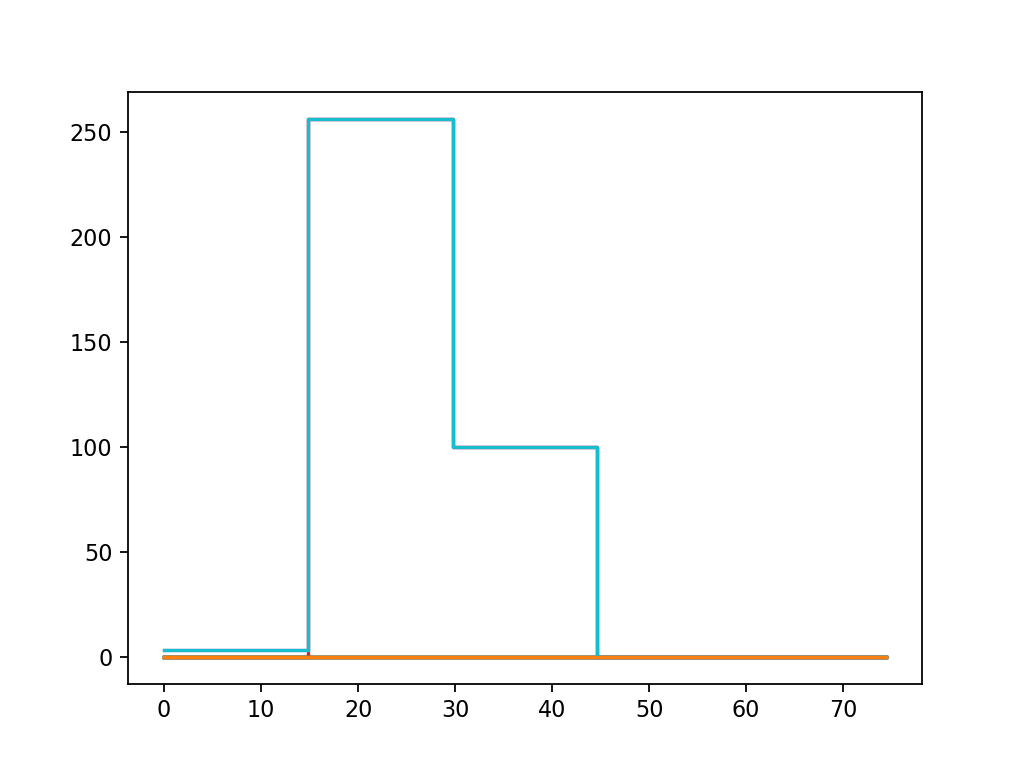

In [33]:



        

Ipy.calcActinicLightProfile(sample_df)

plt.figure()
for traceNum in range(len(sample_df)):
    plt.plot(sample_df['actinicIntensityTime'][traceNum], sample_df['actinicIntensity'][traceNum])
    plt.plot(sample_df['actinicIntensityTime'][traceNum], sample_df['blueActinic'][traceNum])
    plt.plot(sample_df['actinicIntensityTime'][traceNum], sample_df['farRed'][traceNum])
plt.show()


In [34]:
baselineTrace=sample_df[sample_df['trace_label']=='baseline']

wavelengths=[475,488,505,520,535,545]

#subtrace the unsmoothed baseline 
Ipy.subtractBaseline(sample_df, wavelengths, "_calc", "_calc", "_calc_m_b")

#smooth traces and save with _smooth
Ipy.smoothTraces(sample_df, wavelengths, '_calc', 5, '_smooth')

#subtrace the smoothed baseline from the unsmoothed traces
Ipy.subtractBaseline(sample_df, wavelengths, "_calc", "_calc_smooth", "_calc_s_m_b")

#subtrace the smoothed baseline from the smoothed traces
Ipy.subtractBaseline(sample_df, wavelengths, "_calc_smooth", "_calc_smooth", "_calc_s_s_m_b")


<IPython.core.display.Javascript object>


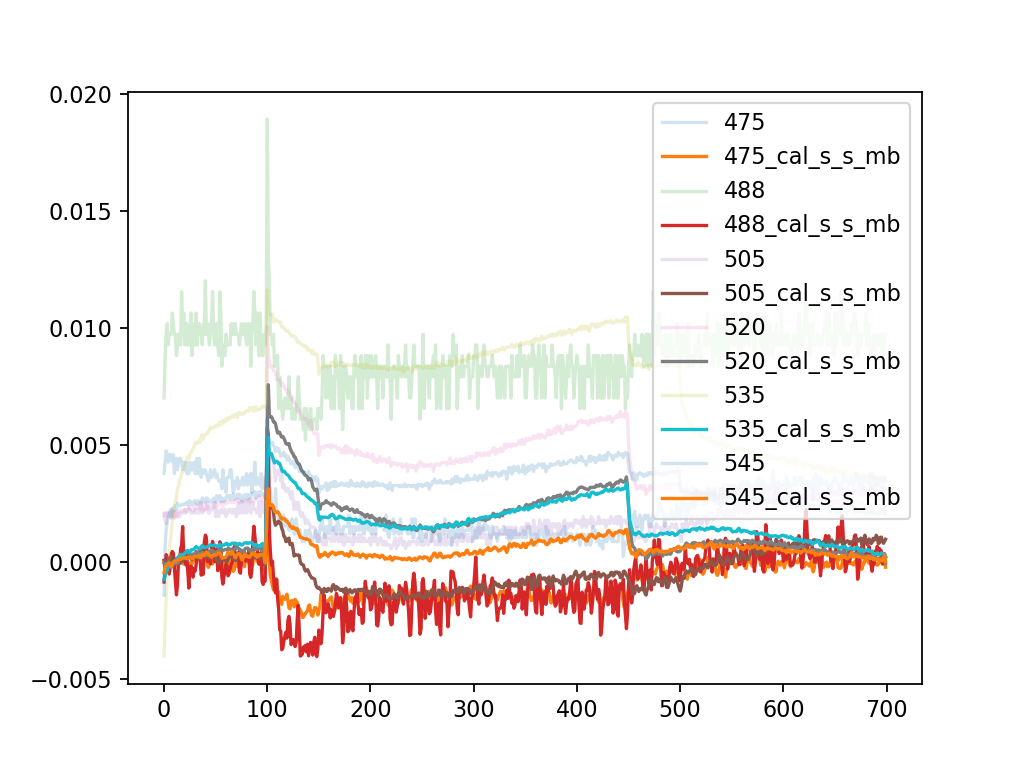

In [36]:
#show the effects of subtracting the baseline traces, both smoothed and unsmoothed

plt.figure()

for t in [3]: #range(len(sample_df)): #['475']:
    for wl in wavelengths:
        plt.plot(sample_df[str(wl)+'_calc'][t], label=wl, alpha=.2)
        #plt.plot(sample_df[str(wl)+'_calc_m_b'][t], label=str(wl) + '_cal_mb', alpha=0.2)
        #plt.plot(sample_df[str(wl)+'_calc_s_m_b'][t], label=str(wl) + '_cal_s_mb', alpha=.4)
        plt.plot(sample_df[str(wl)+'_calc_s_s_m_b'][t], label=str(wl) + '_cal_s_s_mb')
plt.legend()
plt.show()

    

In [14]:

Ipy.recalcAbsUsingI0(sample_df, sample_df['measuring_light_names'][0], '_I', [90,100], [90,-1])    

In [15]:
# plt.figure()
# for t in range(0,len(sample_df)): #['475']:
#     for wl in wavelengths:
#         plt.plot(sample_df[str(wl) + '_time'][t], sample_df[str(wl) + "_rDA"][t], label=str(wl) + "_rDA", alpha=.2)
#         plt.plot(sample_df[str(wl) + '_time'][t], sample_df[str(wl) + "_calc_m_b"][t], label=str(wl) + "_calc_m_b")
#         #plt.plot(sample_df[wl + "_rDA"][t], label=wl + "_rDA")

# plt.legend()
# plt.show()

In [16]:
sample_df.keys()

Index(['475_I', '475_I0', '475_I0a', '475_Ia', '475_calc', '475_calca',
       '475_time', '475auxtime', '488_I', '488_I0',
       ...
       '520_calc_s_s_m_b', '535_calc_s_s_m_b', '545_calc_s_s_m_b', '475_rDA',
       '488_rDA', '505_rDA', '520_rDA', '535_rDA', '545_rDA', 'blue_rDA'],
      dtype='object', length=113)

In [17]:


Ipy.burnCorrection(sample_df,wavelengths,'_rDA',[0,100], '_BCOR')
                            

In [18]:


Ipy.smoothTraces(sample_df, wavelengths, '_calc_m_b', 5, '_smooth')


In [19]:
sample_df.keys()

Index(['475_I', '475_I0', '475_I0a', '475_Ia', '475_calc', '475_calca',
       '475_time', '475auxtime', '488_I', '488_I0',
       ...
       '505_BCOR', '520_BCOR', '535_BCOR', '545_BCOR', '475_calc_m_b_smooth',
       '488_calc_m_b_smooth', '505_calc_m_b_smooth', '520_calc_m_b_smooth',
       '535_calc_m_b_smooth', '545_calc_m_b_smooth'],
      dtype='object', length=125)

<IPython.core.display.Javascript object>


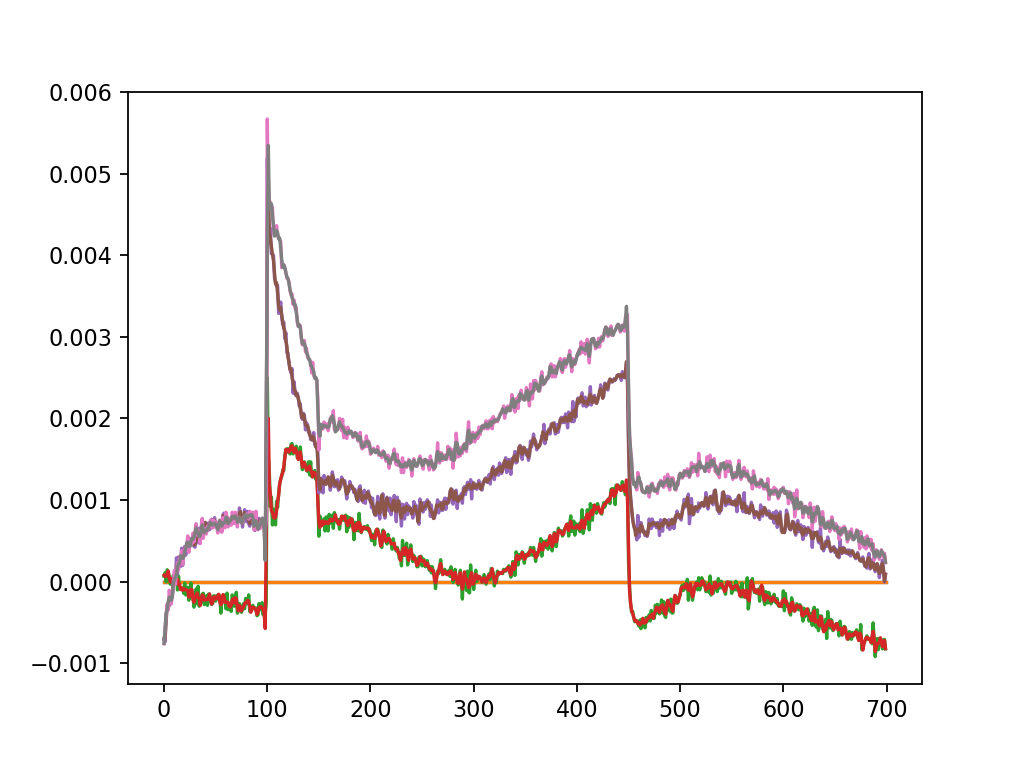

In [20]:
plt.figure()
wl='535'
for i in range(0, len(sample_df[wl +'_calc_m_b_smooth'])):
    plt.plot(sample_df[str(wl)+'_calc_m_b'][i])
    plt.plot(sample_df[str(wl)+'_calc_m_b_smooth'][i])
plt.show()


In [21]:

Ipy.generateDAS(sample_df, wavelengths, '_calc_m_b_smooth', 'das')

<IPython.core.display.Javascript object>


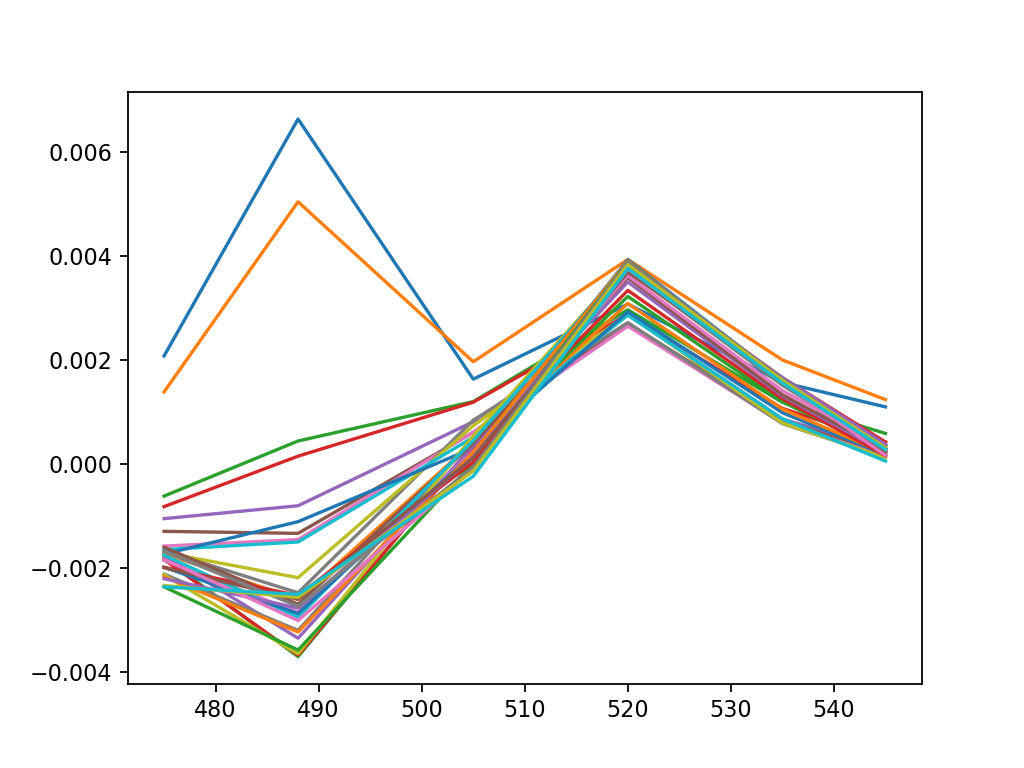

In [22]:
plt.figure()
for i in range(100,130):
    plt.plot(wavelengths,sample_df['das'][1][i])
plt.show()


In [23]:
#wavelengthV=[475,488,505,520,535,545]

In [24]:
# for dfi in range(0, len(sample_df)):
#     plt.figure()

#     for i in range(len(sample_df['das'])):
#         plt.plot(wavelengths, sample_df['das'][dfi][i])
#     plt.show()



In [25]:
Ipy.fitDAS_5(sample_df, wavelengths, 'das', newSuffix='')


<IPython.core.display.Javascript object>


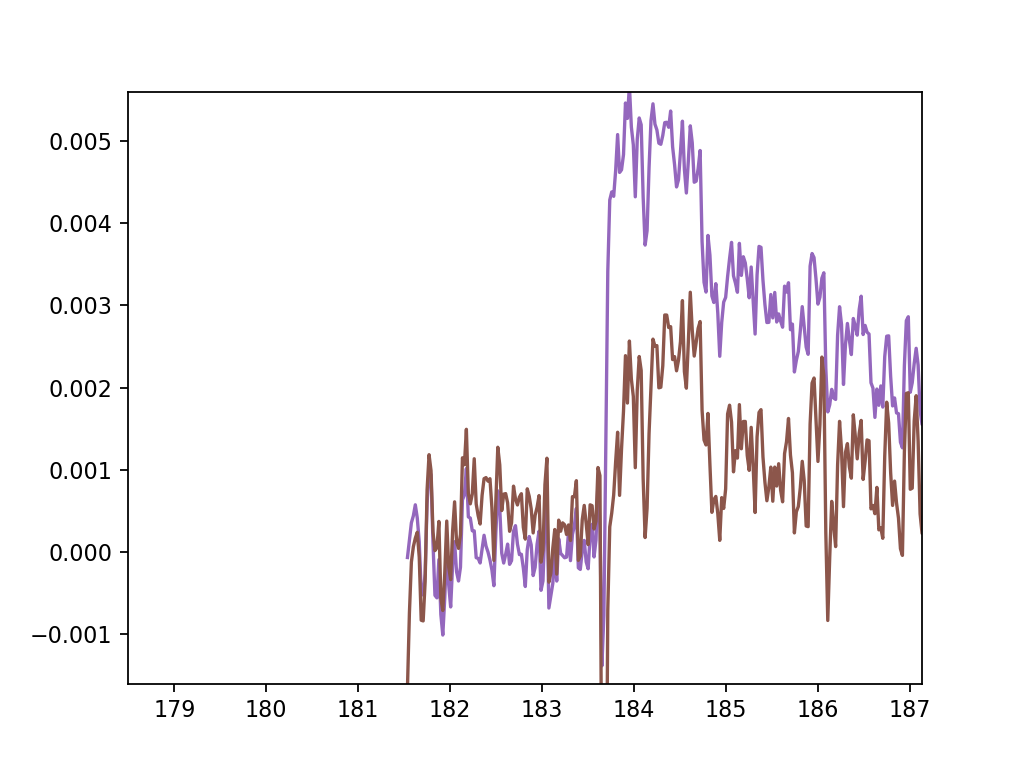

In [26]:
plt.figure()
for i in range(len(sample_df)):
    plt.plot(sample_df['505_time'][i], sample_df['ecs'][i])
    plt.plot(sample_df['505_time'][i], sample_df['qE'][i])
plt.show()

In [27]:
sample_df.head(1)

,475_I,475_I0,475_I0a,475_Ia,475_calc,475_calca,475_time,475auxtime,488_I,488_I0,...,505_calc_m_b_smooth,520_calc_m_b_smooth,535_calc_m_b_smooth,545_calc_m_b_smooth,das,ecs,qE,Zx,scatter,drift
0,"[0.8132933999999999, 0.8119200999999999, 0.811...","[6.708374, 6.699219, 6.698685, 6.699142, 6.699...","[-10, -10, -10, -10, -10, -10, -10, -10, -10, ...","[0.12336739999999999, 0.1213074, 0.12199399999...","[0.003709172, 0.004443123, 0.004647186, 0.0045...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0142, 0.035568999999999996, 0.0569379999999...","[0.0142, 0.035568999999999996, 0.0569379999999...","[0.2915192, 0.2906799, 0.29045099999999996, 0....","[3.663788, 3.6515050000000002, 3.648682, 3.647...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
